In [1]:
import ee
import geemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict
ee.Initialize()

### Structure df2019_fractions.csv

A csv containing the retrieved pixel count for each DW class.
EE Settings used: <br>
* `'GEOMETRY'`: point.buffer(distance=1000)
* `'CLOUDY_PIXEL_PERCENTAGE'`: None
* `time range`: annual

For more info see `get_class_map_df.ipynb`.

#### Important Features
* `'bridgeId'`: index in df2019 dataframe, unique ID for each bridge
* `'totalPixels'`: total pixel count
* `'**classLabel**'`: pixel count for specific class
* `'year'`: year, from 2016 to 2022
* `'S.No'`: BridgeNumber, can be used as a reference to the original dataset `DBR_Excel_data_pro.csv`

Labels available: ['built', 'tree', 'grass', 'crop', 'shrub', 'water', 'flooded_veg', 'bare']

#### Exploration using pandas:
To get a list of all unique bridgeIds use: <br> 
`data['bridgeId'].unique()` <br>
You can then iterate over them, retrieving all entries for each bridge via: <br>
`brigde = data.loc[data['bridgeId'] == i]` <br>
where `i` is the bridgeId


In [58]:
!ls ../data

bridge_year		 df2021_summary_1500.csv
DBR_Excel_data_pro.csv	 nedap_admin_district
df_2019_1500m.csv	 raw_data
df2019_fractions.csv	 Sentinel-2-Shapefile-Index-master
df2019_summary_1500.csv  srtm-cgiar-nepal-boundary-dem-90m.zip
df2019_summary.csv	 srtm_cgiar_nepal_boundary.img
df_2021_1000m.csv	 srtm_cgiar_nepal_boundary.img.aux.xml
df_2021_1500m.csv	 srtm_cgiar_nepal_boundary.rrd
df2021_summary_1000.csv


In [73]:
data = pd.read_csv("../data/df2019_fractions.csv")
data = pd.read_csv("../data/df_2019_1500m.csv")
data = pd.read_csv("../data/df_2021_1000m.csv")
data = pd.read_csv("../data/df_2021_1500m.csv")

"""
for i in range(2,4):
    path = "./df_2019/df2019_2022_"+str(i)+".csv"
    new_df = pd.read_csv(path)
    data = pd.concat([data,new_df], ignore_index=True)"""

'\nfor i in range(2,4):\n    path = "./df_2019/df2019_2022_"+str(i)+".csv"\n    new_df = pd.read_csv(path)\n    data = pd.concat([data,new_df], ignore_index=True)'

In [74]:
data

Unnamed: 0.1  Unnamed: 0  built  water   tree  grass  flooded_veg   crop  \
0               0           0   2893     45  58331   7607            0   2377   
1               1           1    876     84  68519    228            0    521   
2               2           2   8693     31  36097   1448            0  31301   
3               3           3   2771   1840  28805   7479            0   9411   
4               4           4   3243   3320  47399     67           38  13643   
..            ...         ...    ...    ...    ...    ...          ...    ...   
912           912          16     47   2847  43281    980            0    201   
913           913          17   2185   5400  48819   1488            0   3677   
914           914          18    897      0  34210   6654            0   3147   
915           915          19     32   2726  51451    155            0    349   
916           916          20   2084   5196  48813   1141            0   3271   

     shrub  bare  year  bridgeId  totalPixels   Latitude  S.No  Longitude  \
0     8163    58  2015         0        79474  28.267447  3041  82.780081   
1     9236    40  2015         1        79504  28.297827  6138  83.404266   
2     1399    10  2015         2        78979  27.608497  7579  84.081000   
3    25319   394  2015         3        76019  29.113846  8166  81.661377   
4     2192  9057  2015         4        78959  27.561421  8312  83.911259   
..     ...   ...   ...       ...          ...        ...   ...        ...   
912  32993   296  2020       166        80645  29.773290  8603  81.927841   
913  14235  3912  2020       167        79716  28.572076  8604  81.996012   
914  35234   516  2021       165        80658  29.811865  8602  81.961503   
915  25677   255  2021       166        80645  29.773290  8603  81.927841   
916  15095  4116  2021       167        79716  28.572076  8604  81.996012   

     start_year  end_year  
0          2021      2022  
1          2021      2022  
2          2021      2022  
3          2021      2022  
4          2021      2022  
..          ...       ...  
912        2021      2022  
913        2021      2022  
914        2021      2022  
915        2021      2022  
916        2021      2022  

[917 rows x 18 columns]

In [67]:
dic = defaultdict(lambda: defaultdict(list))
label_vis = ['built', 'tree', 'grass', 'crop', 'shrub', 'water']
for i in range(data.shape[0]):

    curr = data.iloc[i]
    for l in label_vis:
        dic[curr["year"]][l].append(curr[l]/curr["totalPixels"])


print(len(list(dic[2016].values())))
print(dic.keys())

6
dict_keys([2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0])


In [15]:
avg = defaultdict(list)
sd = defaultdict(list)
median = defaultdict(list)

for y in range(2016,2023):
    for l in label_vis:
        avg[l].append(np.average(dic[y][l]))
        sd[l].append(np.std(dic[y][l]))
        median[l].append(np.median(dic[y][l]))

for l in label_vis:
    avg[l] = [x/avg[l][0] for x in avg[l]]
    sd[l] = [x/sd[l][0] for x in sd[l]]
    median[l] = [x/median[l][0] for x in median[l]]

/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invali

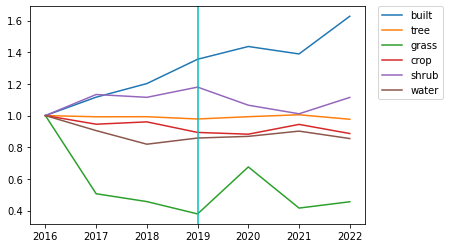

In [7]:
for l in label_vis:
    plt.plot(range(2016,2023),avg[l],label=l)
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.axvline(x=2019, color='c')
plt.show()

In [85]:
# Growth rates

rateDic = defaultdict(lambda: [0,0])

missing = [18, 157,156, 192, 223, 248, 252, 281, 284]

for i in data['bridgeId'].unique():
    
    if i in missing:
        continue

    brigde = data.loc[data['bridgeId'] == i]
    ga_arr = []; gb_arr = []

    for y in range(2016,2020):
        curr = brigde.loc[brigde['year'] == y]
        
        #print(curr['built'],curr['totalPixels'])
        ga_arr.append(float(curr['built'])/float(curr['totalPixels']))

    try:
        ga = np.polyfit(ga_arr,range(1,5),1)[0]
    except:
        ga = 0

    for y in range(2019,2023):
        curr = brigde.loc[brigde['year'] == y]
        gb_arr.append(float(curr['built'])/float(curr['totalPixels']))
    try:
        gb = np.polyfit(gb_arr,range(1,5),1)[0]
    except: 
        gb= 0
    rateDic[i]=[ga,gb]



/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


In [10]:
data.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'built', 'water', 'tree',
       'grass', 'flooded_veg', 'crop', 'shrub', 'bare', 'year', 'bridgeId',
       'totalPixels', 'Latitude', 'S.No', 'Longitude', 'start_year',
       'end_year'],
      dtype='object')

In [31]:
data.describe()

Unnamed: 0.2  Unnamed: 0.1   Unnamed: 0         built       water  \
count   2046.000000   2046.000000  2046.000000   2046.000000  2046.00000   
mean    1022.500000    772.173509   134.332356   1582.294233   378.93304   
std      590.773645    535.088316   114.090609   2908.335079   751.19994   
min        0.000000      0.000000     0.000000      0.000000     0.00000   
25%      511.250000    255.250000    48.000000     87.000000     0.00000   
50%     1022.500000    730.500000   103.500000    574.000000     0.00000   
75%     1533.750000   1241.750000   185.000000   1982.500000   257.75000   
max     2045.000000   1753.000000   491.000000  34915.000000  8643.00000   

               tree         grass  flooded_veg          crop         shrub  \
count   2046.000000   2046.000000  2046.000000   2046.000000   2046.000000   
mean   24158.695992    415.162268     3.778592   2679.537146   5516.706256   
std     7819.719222   1554.111631    46.322029   5481.202122   4834.886607   
min       48.000000      0.000000     0.000000      0.000000      0.000000   
25%    20203.750000      0.000000     0.000000    141.000000   1614.750000   
50%    26171.000000     19.000000     0.000000    600.500000   4149.000000   
75%    29792.750000    194.750000     0.000000   2196.250000   8367.250000   
max    35135.000000  29544.000000  1350.000000  31268.000000  23375.000000   

               bare         year     bridgeId   totalPixels     Latitude  \
count   2046.000000  2046.000000  2046.000000   2046.000000  2046.000000   
mean     399.324047  2018.997556   148.463832  35164.338710    28.255439   
std      939.627464     2.001098    86.633480   1910.257662     0.806232   
min        0.000000  2016.000000     0.000000    350.000000    26.543485   
25%        0.000000  2017.000000    74.000000  35119.000000    27.694147   
50%       10.000000  2019.000000   147.000000  35288.000000    28.184799   
75%      289.750000  2021.000000   222.000000  35510.000000    28.803713   
max    11743.000000  2022.000000   300.000000  35862.000000    29.812680   

              S.No    Longitude  start_year  end_year  
count  2046.000000  2046.000000      2046.0    2046.0  
mean   7584.607038    83.585834      2019.0    2020.0  
std     848.132889     2.254173         0.0       0.0  
min     922.000000    80.126325      2019.0    2020.0  
25%    7597.000000    81.747858      2019.0    2020.0  
50%    7711.000000    83.173137      2019.0    2020.0  
75%    7787.000000    85.234727      2019.0    2020.0  
max    8376.000000    88.110760      2019.0    2020.0

In [46]:
base_cols=['S.No', 'Latitude', 'Longitude',
      'totalPixels', 'start_year', 'end_year',
      ]
cols = base_cols.copy()
labels = ['built', 'water', 'tree',
      'grass', 'flooded_veg', 'crop', 'shrub', 'bare']
# for y in range(2016, 2022+1):
for y in range(2015, 2021+1):
    for l in labels:
        cols.append(l+'_'+str(y))

print(base_cols, cols)
df = pd.DataFrame(columns=cols)

['S.No', 'Latitude', 'Longitude', 'totalPixels', 'start_year', 'end_year'] ['S.No', 'Latitude', 'Longitude', 'totalPixels', 'start_year', 'end_year', 'built_2015', 'water_2015', 'tree_2015', 'grass_2015', 'flooded_veg_2015', 'crop_2015', 'shrub_2015', 'bare_2015', 'built_2016', 'water_2016', 'tree_2016', 'grass_2016', 'flooded_veg_2016', 'crop_2016', 'shrub_2016', 'bare_2016', 'built_2017', 'water_2017', 'tree_2017', 'grass_2017', 'flooded_veg_2017', 'crop_2017', 'shrub_2017', 'bare_2017', 'built_2018', 'water_2018', 'tree_2018', 'grass_2018', 'flooded_veg_2018', 'crop_2018', 'shrub_2018', 'bare_2018', 'built_2019', 'water_2019', 'tree_2019', 'grass_2019', 'flooded_veg_2019', 'crop_2019', 'shrub_2019', 'bare_2019', 'built_2020', 'water_2020', 'tree_2020', 'grass_2020', 'flooded_veg_2020', 'crop_2020', 'shrub_2020', 'bare_2020', 'built_2021', 'water_2021', 'tree_2021', 'grass_2021', 'flooded_veg_2021', 'crop_2021', 'shrub_2021', 'bare_2021']


In [31]:
# Growth rates
# save result into csv
# for year 2019
missing = [18, 157,156, 192, 223, 248, 252, 281, 284]

gas, gbs = [], []
good = []
for i in data['bridgeId'].unique():
    
    if i in missing:
        continue

    bridge = data.loc[data['bridgeId'] == i]
    # add basic info of this bridge
    temp = bridge.iloc[[0]]
    row = []

    # add yearly info 
    for c in cols:
        if c in base_cols:
            row.extend([float(temp[c])])
        else:
            y = int(c.split('_')[-1])
            curr = bridge.loc[bridge['year'] == y]
            curr_label = c.split('_')[:-1]
            if len(curr_label) > 1:
                curr_label = ['_'.join(curr_label)]
            row.extend([float(curr[curr_label[0]])])
#     print(row)
#     break
    # compute increase rate before/after
    ga_arr = []; gb_arr = []
    for y in range(2016,2020):
        curr = bridge.loc[bridge['year'] == y]
        
        print(curr)
        
        #print(curr['built'],curr['totalPixels'])
        ga_arr.append(float(curr['built'])/float(curr['totalPixels']))

    try:
        ga = np.polyfit(ga_arr,range(1,5),1)[0]
    except:
        ga = 0

    for y in range(2019,2023):
        curr = bridge.loc[bridge['year'] == y]
        gb_arr.append(float(curr['built'])/float(curr['totalPixels']))
    try:
        gb = np.polyfit(gb_arr,range(1,5),1)[0]
    except: 
        gb= 0
    gas.append(ga)
    gbs.append(gb)
    
    # define good or bad
    
    # slope < 0, before
    if ga < 0:
        if gb > 0:
            good.append(1)
        elif gb < 0:
            if gb/ga>1:
                good.append(0)
            else:
                good.append(1)
        else:
            good.append(-1)
    # slope > 0, before
    elif ga > 0:
        if gb < 0:
            good.append(0)
        elif gb > 0:
            if gb/ga>1:
                good.append(1)
            else:
                good.append(0)
        else:
            good.append(-1)
    else:
        good.append(-1)
    
    # add to df
    df.loc[len(df.index)] = row
    
df['slope_before'] = np.array(gas)
df['slope_after'] = np.array(gbs)
df['slope_ratio'] = np.array(gbs)/np.array(gas)
df['slope_good'] = np.array(good)

   Unnamed: 0.1  Unnamed: 0  built  water   tree  grass  flooded_veg  crop  \
5             5           5   4251      0  44402    195            0  5759   

   shrub  bare  year  bridgeId  totalPixels   Latitude  S.No  Longitude  \
5  24705   162  2016         0        79474  28.267447  3041  82.780081   

   start_year  end_year  
5        2021      2022  
    Unnamed: 0.1  Unnamed: 0  built  water   tree  grass  flooded_veg  crop  \
10            10          10   3611      0  44106      5            0  3787   

    shrub  bare  year  bridgeId  totalPixels   Latitude  S.No  Longitude  \
10  27815   150  2017         0        79474  28.267447  3041  82.780081   

    start_year  end_year  
10        2021      2022  
    Unnamed: 0.1  Unnamed: 0  built  water   tree  grass  flooded_veg  crop  \
15            15          15   4012      0  44651      0            0  4682   

    shrub  bare  year  bridgeId  totalPixels   Latitude  S.No  Longitude  \
15  25968   161  2018         0        

TypeError: cannot convert the series to <class 'float'>

In [75]:
# Growth rates
# save result into csv

# missing = [18, 157,156, 192, 223, 248, 252, 281, 284]
base_cols=['S.No', 'Latitude', 'Longitude',
      'totalPixels', 'start_year', 'end_year',
      ]
cols = base_cols.copy()
labels = ['built', 'water', 'tree',
      'grass', 'flooded_veg', 'crop', 'shrub', 'bare']
# for y in range(2016, 2022+1):
for y in range(2015, 2021+1):
    for l in labels:
        cols.append(l+'_'+str(y))

print(base_cols, cols)
df = pd.DataFrame(columns=cols)

gas, gbs = [], []
good = []
for i in data['bridgeId'].unique():
    
    if i in missing:
        continue

    bridge = data.loc[data['bridgeId'] == i]
    # add basic info of this bridge
    temp = bridge.iloc[[0]]
    row = []

    # add yearly info 
    for c in cols:
        if c in base_cols:
            row.extend([float(temp[c])])
        else:
            y = int(c.split('_')[-1])
            curr = bridge.loc[bridge['year'] == y]
            curr_label = c.split('_')[:-1]
            if len(curr_label) > 1:
                curr_label = ['_'.join(curr_label)]
            if len(curr[curr_label[0]]) > 1:
#                 print(len(curr[curr_label[0]]), curr[curr_label[0]][0])
                row.extend([float(curr[curr_label[0]].iloc[0])])
            else:
                row.extend([float(curr[curr_label[0]])])
#     print(row)
#     break
    # compute increase rate before/after
    ga_arr = []; gb_arr = []
#     for y in range(2016,2020):
    for y in range(2015,2019):
        curr = bridge.loc[bridge['year'] == y]
        
#         print(curr)
        
        #print(curr['built'],curr['totalPixels'])
        if len(curr['built']) > 1:
            ga_arr.append(float(curr['built'].iloc[0])/float(curr['totalPixels'].iloc[0]))
        else:
            ga_arr.append(float(curr['built']/float(curr['totalPixels'])))

    try:
        ga = np.polyfit(ga_arr,range(1,5),1)[0]
    except:
        ga = 0

    for y in range(2018,2022):
        curr = bridge.loc[bridge['year'] == y]
        if len(curr['built']) > 1:
            gb_arr.append(float(curr['built'].iloc[0])/float(curr['totalPixels'].iloc[0]))
        else:
            gb_arr.append(float(curr['built']/float(curr['totalPixels'])))
        print(gb_arr)
    try:
        gb = np.polyfit(gb_arr,range(1,5),1)[0]
    except: 
        gb= 0
    gas.append(ga)
    gbs.append(gb)

    
    # define good or bad
    
    # slope < 0, before
    if ga < 0:
        if gb > 0:
            good.append(1)
        elif gb < 0:
            if gb/ga>1:
                good.append(0)
            else:
                good.append(1)
        else:
            good.append(-1)
    # slope > 0, before
    elif ga > 0:
        if gb < 0:
            good.append(0)
        elif gb > 0:
            if gb/ga>1:
                good.append(1)
            else:
                good.append(0)
        else:
            good.append(-1)
    else:
        good.append(-1)
    
    # add to df
    df.loc[len(df.index)] = row
    
df['slope_before'] = np.array(gas)
df['slope_after'] = np.array(gbs)
df['slope_ratio'] = np.array(gbs)/np.array(gas)
df['slope_good'] = np.array(good)

['S.No', 'Latitude', 'Longitude', 'totalPixels', 'start_year', 'end_year'] ['S.No', 'Latitude', 'Longitude', 'totalPixels', 'start_year', 'end_year', 'built_2015', 'water_2015', 'tree_2015', 'grass_2015', 'flooded_veg_2015', 'crop_2015', 'shrub_2015', 'bare_2015', 'built_2016', 'water_2016', 'tree_2016', 'grass_2016', 'flooded_veg_2016', 'crop_2016', 'shrub_2016', 'bare_2016', 'built_2017', 'water_2017', 'tree_2017', 'grass_2017', 'flooded_veg_2017', 'crop_2017', 'shrub_2017', 'bare_2017', 'built_2018', 'water_2018', 'tree_2018', 'grass_2018', 'flooded_veg_2018', 'crop_2018', 'shrub_2018', 'bare_2018', 'built_2019', 'water_2019', 'tree_2019', 'grass_2019', 'flooded_veg_2019', 'crop_2019', 'shrub_2019', 'bare_2019', 'built_2020', 'water_2020', 'tree_2020', 'grass_2020', 'flooded_veg_2020', 'crop_2020', 'shrub_2020', 'bare_2020', 'built_2021', 'water_2021', 'tree_2021', 'grass_2021', 'flooded_veg_2021', 'crop_2021', 'shrub_2021', 'bare_2021']
[0.05048191861489292]
[0.05048191861489292, 0

/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


[0.032167411050333716]
[0.032167411050333716, 0.048163296030511366]
[0.032167411050333716, 0.048163296030511366, 0.04488884428162794]
[0.032167411050333716, 0.048163296030511366, 0.04488884428162794, 0.03417473779294425]
[0.003898464431212786]
[0.003898464431212786, 0.010905672203071138]
[0.003898464431212786, 0.010905672203071138, 0.014453149482920714]
[0.003898464431212786, 0.010905672203071138, 0.014453149482920714, 0.012785960513945472]
[0.013765090827033736]
[0.013765090827033736, 0.019745007333859865]
[0.013765090827033736, 0.019745007333859865, 0.027831057956297717]
[0.013765090827033736, 0.019745007333859865, 0.027831057956297717, 0.014316697381122519]
[0.011879225780554196]
[0.011879225780554196, 0.02246641327663418]
[0.011879225780554196, 0.02246641327663418, 0.0336808038234298]
[0.011879225780554196, 0.02246641327663418, 0.0336808038234298, 0.024147317452552088]
[0.02059166551711165]
[0.02059166551711165, 0.02251037734665981]
[0.02059166551711165, 0.02251037734665981, 0.0350

/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


[0.004103967168262654]
[0.004103967168262654, 0.013315930169806348]
[0.004103967168262654, 0.013315930169806348, 0.025314072716776066]
[0.004103967168262654, 0.013315930169806348, 0.025314072716776066, 0.020595137991189647]
[0.023625521614704808]
[0.023625521614704808, 0.02638645503712762]
[0.023625521614704808, 0.02638645503712762, 0.030988010741165643]
[0.023625521614704808, 0.02638645503712762, 0.030988010741165643, 0.02230178641217332]
[0.011697452750601241]
[0.011697452750601241, 0.01272995127110641]
[0.011697452750601241, 0.01272995127110641, 0.009808735944799104]
[0.011697452750601241, 0.01272995127110641, 0.009808735944799104, 0.008801420315037964]
[0.0011791417353454008]
[0.0011791417353454008, 0.003085839009520942]
[0.0011791417353454008, 0.003085839009520942, 0.0037883064263224578]
[0.0011791417353454008, 0.003085839009520942, 0.0037883064263224578, 0.0035123370840075764]
[0.0147839798170924]
[0.0147839798170924, 0.019009776095868812]
[0.0147839798170924, 0.01900977609586881

/home/yuchang/Desktop/PhD/Work/global-biomass/logs/global/lib/python3.8/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


[0.031564259855189056]
[0.031564259855189056, 0.05905571198712792]
[0.031564259855189056, 0.05905571198712792, 0.06752815768302493]
[0.031564259855189056, 0.05905571198712792, 0.06752815768302493, 0.05737127916331456]
[0.014882302535410051]
[0.014882302535410051, 0.011769746458994909]
[0.014882302535410051, 0.011769746458994909, 0.01112707293714401]
[0.014882302535410051, 0.011769746458994909, 0.01112707293714401, 0.017238772115530016]
[0.013474107591754651]
[0.013474107591754651, 0.022448466566113625]
[0.013474107591754651, 0.022448466566113625, 0.030392156862745098]
[0.013474107591754651, 0.022448466566113625, 0.030392156862745098, 0.023856209150326796]
[0.012944577101922835]
[0.012944577101922835, 0.010870931255498303]
[0.012944577101922835, 0.010870931255498303, 0.01562146537639814]
[0.012944577101922835, 0.010870931255498303, 0.01562146537639814, 0.012617820786728667]
[0.00022639800769753225]
[0.00022639800769753225, 0.0]
[0.00022639800769753225, 0.0, 0.0]
[0.00022639800769753225,

/tmp/ipykernel_1611315/3823901913.py:114: RuntimeWarning: divide by zero encountered in divide
  df['slope_ratio'] = np.array(gbs)/np.array(gas)
/tmp/ipykernel_1611315/3823901913.py:114: RuntimeWarning: invalid value encountered in divide
  df['slope_ratio'] = np.array(gbs)/np.array(gas)


In [77]:
# save df
df =  df.dropna()
df.to_csv("../data/df2021_summary_1500.csv")